# CCE2502: Pattern Recognition and Machine Learning 
## Assignment	I:	


In [159]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.datasets import make_blobs



### <u>Task 1 : </u>
#### a)

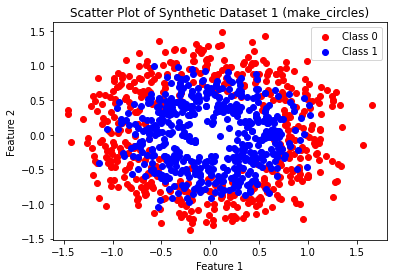

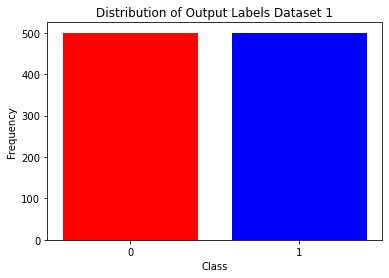

Mean of features (Dataset 1): [ 0.00244319 -0.00251676]
Standard deviation of features (Dataset 1): [0.6158258  0.61647738]


In [160]:
from sklearn.datasets import make_circles 

n_samples = 1000

X1, y1 = make_circles( n_samples , noise = 0.2, random_state = 0, 
factor = 0.6) 
# Setting parameters of the make circle fucntion 
# Note that for the requirement "inputs=2" this is met by the number of features in make_circles always being 2 

X1_class_0 = X1[y1 == 0] # Defining class 0
X1_class_1 = X1[y1 == 1] # Defininf class 1

plt.scatter(X1_class_0[:, 0], X1_class_0[:, 1], color='red', label='Class 0')
# Plotting scatter plot for class 0 as red
plt.scatter(X1_class_1[:, 0], X1_class_1[:, 1], color='blue', label='Class 1')
# Plotting scatter plot for class 1 as blue
plt.title('Scatter Plot of Synthetic Dataset 1 (make_circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


unique, counts = np.unique(y1, return_counts=True)
# Calculating the unique outputs of y (0 and 1) and counting their occurances for the bar plot

plt.bar(unique, counts, color=['red', 'blue'])
plt.title('Distribution of Output Labels Dataset 1')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique) # aranging x-axis scale
plt.show()
# This plot shows the distribtuion of the dataset outputs
# It may be seen how the number of generated samples is evenly split between the two classes as we have set the random_state parameter in make_circles to 0

mean_values = np.mean(X1, axis=0)
std_values = np.std(X1, axis=0)
# Note parameter axis=0, make sure the values are calculated respective axes
print("Mean of features (Dataset 1):", mean_values)
print("Standard deviation of features (Dataset 1):", std_values)

#### b)

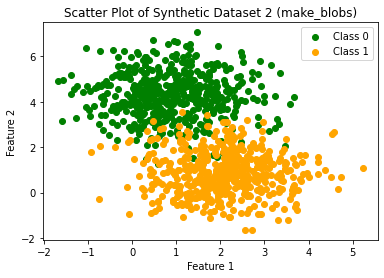

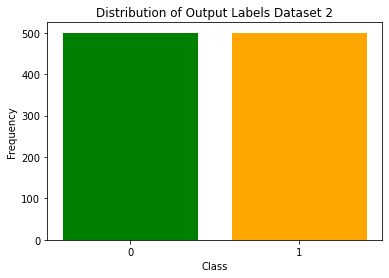

Mean of features (Dataset 2): [1.48980274 2.58551082]
Standard deviation of features (Dataset 2): [1.13433172 1.95390043]


In [161]:
from sklearn.datasets import make_circles 

X2, y2 = make_blobs (n_samples, centers=2,
cluster_std=1.0, n_features=2, random_state=0)
# Setting parameters of the make blobs fucntion 

X2_class_0 = X2[y2 == 0] # Defining class 0
X2_class_1 = X2[y2 == 1] # Defininf class 1

plt.scatter(X2_class_0[:, 0], X2_class_0[:, 1], color='green', label='Class 0')
# Plotting scatter plot for class 0 as green
plt.scatter(X2_class_1[:, 0], X2_class_1[:, 1], color='orange', label='Class 1')
# Plotting scatter plot for class 1 as orange
plt.title('Scatter Plot of Synthetic Dataset 2 (make_blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


unique, counts = np.unique(y2, return_counts=True)
# Calculating the unique outputs of y (0 and 1) and counting their occurances for the bar plot

plt.bar(unique, counts, color=['green', 'orange'])
plt.title('Distribution of Output Labels Dataset 2')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique) # aranging x-axis scale
plt.show()
# This plot shows the distribtuion of the dataset outputs
# It may be seen how the number of generated samples is evenly split between the two classes as we have set the random_state parameter in make_blobs to 0

mean_values = np.mean(X2, axis=0)
std_values = np.std(X2, axis=0)
# Note parameter axis=0, make sure the values are calculated respective axes
print("Mean of features (Dataset 2):", mean_values)
print("Standard deviation of features (Dataset 2):", std_values)

### <u>Task 2 : </u>
#### a)


In [162]:
def Shuffle_SplitDataset(X, y, train_ratio):

    if len(X) != len(y):
        print("Number of samples in X and y must be the same!")
        return None
    

    indices = np.arange(len(X)) 
    # Creates an array containing integers from 0 to len(X) - 1
    np.random.shuffle(indices)
    # Shuffles the elements of the array

    split_index = int(len(X) * train_ratio)
    # Determining the split index

    X_train, y_train = X[indices[:split_index]] , y[indices[:split_index]]
    # Assignment of the train values using the split index as a tail 
    X_test , y_test = X[indices[split_index:]] , y[indices[split_index:]]
    # Assigment of the test values using the split index as a header

    return X_train, X_test, y_train, y_test
    # Function returns the respective X and y train and test arrays.
  

#### b)

#### Classification Metrics:
- **Accuracy**: 
measures the ratio of correct predictions to the total number of input samples.
  
- **Recall (Sensitivity)**:
measures the ability of the model to correctly identify all relevant instances.

- **Precision**:
measures the ability of the model to identify only the relevant data points.

- **F1-score**:
is the harmonic mean of precision and recall, providing a single score that balances both metrics.


In [163]:
# For the following function we need two inputs arrays
# y_true being the know correct outputs expected 
# y_pred being the outputs recieved from the model
def ClassificationMetrics(y_true , y_pred):

    if len(y_true) != len(y_pred):
        # Check if lengths of y_true and y_pred are equal
        print("Lengths of y_true and y_pred are not equal.")
        return None
    


    correct_predictions = (y_true == y_pred).sum()
    # Counting the number of correct predictions
    if len(y_true) != 0:
        accuracy = correct_predictions / len(y_true)
        # Calculating the classification accuracy (correct/total inputs)
    else :
        accuracy = 0
        # Handeling error case of dividing by zero

    # The relavant instance are 1s

    total_true_positives = (y_true == 1).sum()
    # Counting the total number of true positive instances

    total_predicted_positives = (y_pred == 1).sum()
    # Counting the total number of predicetd positive instances
  
    true_predicted_positives = total_predicted_positives & total_true_positives
    # Counting the number of true positive predictions 
    # Note predicted 1s need to be confirmed with an AND with respect to the true positives  

    if total_true_positives != 0:
        recall = true_predicted_positives / total_true_positives 
        # Calculating the classification recall (total true pred 1s / total true 1s)
    
    else : 
        recall = 0
        # if conditional expression used to avoid division by zero. 
    

    if total_predicted_positives != 0 :
        precision = true_predicted_positives / total_predicted_positives
        # Calculating the classification recall (total true pred 1s / total predicted 1s)
    
    else : 
        precision = 0
        # if conditional expression used to avoid division by zero. 

    if (precision + recall) != 0 :
        f1_score = 2 * (precision * recall) / (precision + recall) 
        # F1 score calculation based on formula 
    
    else :
        f1_score = 0
        ## If both precision and recall are zero (which may happen if there are no positive predictions), set to 0 to avoid division by zero.

    return accuracy,recall,precision,f1_score


### <u>Task 3 : </u>
#### a)


In [164]:
X1_train, X1_test, y1_train, y1_test = Shuffle_SplitDataset( X1, y1 , 0.8 )
X2_train, X2_test, y2_train, y2_test = Shuffle_SplitDataset( X2, y2 , 0.8 )

In [165]:
X1_train, X1_val, y1_train, y1_val = Shuffle_SplitDataset( X1_train, y1_train , 0.2 )
X2_train, X2_val, y2_train, y2_val = Shuffle_SplitDataset( X2_train, y2_train , 0.2 )
# Spliting train into a further subsection of valadation  

In [166]:
from sklearn.neighbors import KNeighborsClassifier

def BestClassification( X_train, X_val, y_train, y_val, max_k=10, step=2 ):
    
    best_f1_score = 0
    # Vairable to keep track of best f1 score for comparsions 
    best_f1_k = 0
    # Vairable holding the value of k with best f1 score

    best_accuracy = 0
    # Vairable to keep track of best accuracy for comparsions 
    best_accuracy_k = 0
    # Vairable holding the value of k with best accuracy

    k_values = range(1, max_k + 1, step)
    # Defining a range of k values to test with a max_k and step

    for k in k_values:
        # Iterate through each value of k

        model = KNeighborsClassifier(n_neighbors=k)
        # Train a k-NN model with the current value of k  
        model.fit(X_train, y_train)
        # Fit the model to the train values 
    
    
        y_pred = model.predict(X_val)
        # Make predictions on the validation set using the established model fit
    
   
        accuracy, recall, precision, f1 = ClassificationMetrics(y_val, y_pred)

        
        if f1 > best_f1_score:
            # Update the best F1-score and corresponding k value if necessary
            best_f1_score = f1
            best_f1_k = k

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_accuracy_k  = k    

    return  best_f1_k, best_f1_score, best_accuracy_k, best_accuracy

#### b)


In [167]:
best_f1_k1, best_f1_score1, best_accuracy_k1, best_accuracy1 = BestClassification(X1_train, X1_val, y1_train, y1_val)

print("Best k value for F1-score in dataset 1: ", best_f1_k1)
print("Best F1-score for dataset 1: ", best_f1_score1)

best_f1_k2, best_f1_score2, best_accuracy_k2, best_accuracy2  = BestClassification(X2_train, X2_val, y2_train, y2_val)

print("Best k value for F1-score in dataset 2:", best_f1_k2)
print("Best F1-score for dataset 2: ", best_f1_score2)


Best k value for F1-score in dataset 1:  1
Best F1-score for dataset 1:  0.9952153110047847
Best k value for F1-score in dataset 2: 5
Best F1-score for dataset 2:  0.9894419306184011


#### c)


In [168]:
print("Best k value for accuracy in dataset 1: ", best_accuracy_k1)
print("Best accuracy for dataset 1: ", best_accuracy1)

print("Best k value for accuracy in dataset 2: ", best_accuracy_k2)
print("Best accuracy for dataset 2: ", best_accuracy2)

Best k value for accuracy in dataset 1:  9
Best accuracy for dataset 1:  0.7875
Best k value for accuracy in dataset 2:  9
Best accuracy for dataset 2:  0.9515625


### <u>Task 4 : </u>
#### a) Design Description of Computational Experiment:

- Algorithms models : Comparision between the the standard brute search and the kdTree search methods will be carried out. Both form part of the kNN class in the sci-kit learn package.

- Training and Test Datasets : The datasets generated in task 1 will be used seperatly.First the test is to be done with the make_circles then the make_blobs. With varying values of n_samples to alter the dataset size as well as the use of respective functions created in this assignment.

- Models and Training methods: 

   The brute-force search and the kd-tree search methods will have different parameters to be passed. These parameters and training methods shall be identified through the scikit-learn neighbors module.

   - Brute-Force Search Method:
      is considered to be the most naive neighbor search implementation involving computation of distances between all pairs of points in the dataset. 
    
      Taking N samples in D dimensions, time complexity scale =  O(DN^2) .
    
      So in summary brute-force can be competitively efficient for small data samples but quickly becomes infeasible as N increases. 

      To train the model:
      - We initialize a KNeighborsClassifier object with the desired parameters  algorithm = 'brute' and respective parameters (number of neighbors, distance metric) .
      - Then we call the fit method on the initialized model object, passing the training data (features and labels) as arguments.

   - kd-Tree Search Method:
      is a binary tree structure which recursively partitions the parameter space along the data axes

      The computational cost of the tree-based data structrues = O(DNlog(N)).

      The construction of a KD tree is very fast: because partitioning is performed only along the data axes.

      To train the model:
     - We initialize a KNeighborsClassifier object with algorithm = ‘kd_tree’ and parameters specifying the algorithm such as the "leaf_size".
     - Then we call the fit method on the initialized model object, passing the training data (features and labels) as arguments.

   Note: both methods use the same KNeighborsClassifier class, but the can be controlled through parameters.

- Time Measurement: 
   to measure the computational time taken by each model to predict the categories for the fixed-size test dataset.

   The Inference time measurements can be implemented using Python's built-in time module.

   Repeated measurements will be taken and an average time will be calculated for accuracy purposes.

- Repeat Experiment: 
   the experiment is to be repeated with various dataset sizes to reach an informative ultiamte conclusion which should match the methods theory mentioned.





In [169]:
import time # Import for respective time calculation functions

def BruteForceTime (X_train, X_test, y_train, y_test):
     model = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
     model.fit(X_train, y_train)
     start_time = time.time()
     y_pred = model.predict(X_test)
     end_time = time.time()
     return end_time - start_time

def kdTreeTime(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    return end_time - start_time

n_samples_list = [100, 1000, 10000, 25000, 50000, 75000, 100000, 150000, 200000, 250000]
train_ratio = 0.8
n_neighbors = 5



In [170]:

print("Testing using the make_circles Datasets:")

for n_samples in n_samples_list:
    print(f"Dataset Number of Smaples Size: {n_samples}")

    X_circles, y_circles = make_circles(n_samples , noise = 0.2, random_state = 0, factor = 0.6) 

    X_train, X_test, y_train, y_test = Shuffle_SplitDataset(X_circles, y_circles, train_ratio)

    bfTime = BruteForceTime( X_train, X_test, y_train, y_test )
    print(f"Inference Time for Brute-Force Method: {bfTime:.6f} seconds")

    kdTime = kdTreeTime( X_train, X_test, y_train, y_test )
    print(f"Inference Time for kd-Tree Method: {kdTime:.6f} seconds")

    print("\n")


Testing using the make_circles Datasets:
Dataset Number of Smaples Size: 100
Inference Time for Brute-Force Method: 0.002147 seconds
Inference Time for kd-Tree Method: 0.001237 seconds


Dataset Number of Smaples Size: 1000
Inference Time for Brute-Force Method: 0.000980 seconds
Inference Time for kd-Tree Method: 0.005455 seconds


Dataset Number of Smaples Size: 10000
Inference Time for Brute-Force Method: 0.025231 seconds
Inference Time for kd-Tree Method: 0.027609 seconds


Dataset Number of Smaples Size: 25000
Inference Time for Brute-Force Method: 0.100355 seconds


Inference Time for kd-Tree Method: 0.064245 seconds


Dataset Number of Smaples Size: 50000
Inference Time for Brute-Force Method: 0.365701 seconds
Inference Time for kd-Tree Method: 0.131435 seconds


Dataset Number of Smaples Size: 75000
Inference Time for Brute-Force Method: 0.720071 seconds
Inference Time for kd-Tree Method: 0.186071 seconds


Dataset Number of Smaples Size: 100000
Inference Time for Brute-Force Method: 1.233813 seconds
Inference Time for kd-Tree Method: 0.256363 seconds


Dataset Number of Smaples Size: 150000
Inference Time for Brute-Force Method: 2.745187 seconds
Inference Time for kd-Tree Method: 0.349709 seconds


Dataset Number of Smaples Size: 200000
Inference Time for Brute-Force Method: 4.848639 seconds
Inference Time for kd-Tree Method: 0.482228 seconds


Dataset Number of Smaples Size: 250000
Inference Time for Brute-Force Method: 7.462460 seconds
Inference Time for kd-Tree Method: 0.675696 seconds




In [171]:

print("Testing using the make_blobs Datasets:")

for n_samples in n_samples_list:
    print(f"Dataset Number of Smaples Size: {n_samples}")

    X_blobs, y_blobs = make_blobs(n_samples, centers=2,
cluster_std=1.0, n_features=2, random_state=0)

    X_train, X_test, y_train, y_test = Shuffle_SplitDataset(X_blobs, y_blobs, train_ratio)

    bfTime = BruteForceTime( X_train, X_test, y_train, y_test )
    print(f"Inference Time for Brute-Force Method: {bfTime:.6f} seconds")

    kdTime = kdTreeTime( X_train, X_test, y_train, y_test )
    print(f"Inference Time for kd-Tree Method: {kdTime:.6f} seconds")

    print("\n")


Testing using the make_blobs Datasets:
Dataset Number of Smaples Size: 100
Inference Time for Brute-Force Method: 0.004684 seconds
Inference Time for kd-Tree Method: 0.000990 seconds


Dataset Number of Smaples Size: 1000
Inference Time for Brute-Force Method: 0.001026 seconds
Inference Time for kd-Tree Method: 0.003953 seconds


Dataset Number of Smaples Size: 10000
Inference Time for Brute-Force Method: 0.089013 seconds
Inference Time for kd-Tree Method: 0.038952 seconds


Dataset Number of Smaples Size: 25000
Inference Time for Brute-Force Method: 0.087142 seconds
Inference Time for kd-Tree Method: 0.065945 seconds


Dataset Number of Smaples Size: 50000
Inference Time for Brute-Force Method: 0.335057 seconds
Inference Time for kd-Tree Method: 0.141810 seconds


Dataset Number of Smaples Size: 75000
Inference Time for Brute-Force Method: 0.729003 seconds
Inference Time for kd-Tree Method: 0.182113 seconds


Dataset Number of Smaples Size: 100000
Inference Time for Brute-Force Method


The outcome of this experiment confirm the key performance metrics of the brute-force and kd-tree methods for kNN inference across varying dataset sizes.

**Brute-force vs. kd-tree Methods:**
   - As previously mentioned, theoretical analysis suggests that the brute-force method has a time complexity of O(DN^2), D being the number of dimensions and N is the number of samples. On the other hand, the kd-tree method has a time complexity of O(DNlog(N)).
   - The results align with these theoretical expectations, as the kd-tree method tends to exhibit an overhead associated with constructing and traversing. This causing the kd-tree method to initially fall behind the brute-force method in computation. However as the number of samples in the dataset increases further, we see that this overhead is justified and due to the tree nature of the kd-tree method it begins to outperform the brute-force method.

**Consistency Across Datasets:**
   - The experiment evaluates the performance of both methods using two synthetic datasets ( make_circles and make_blobs). The results obtained remained consistent across these datasets. Indicating that the observed trends are robust and not specific to a particular dataset type.
   - This consistency also aligning with theoretical expectations, suggesting that the performance characteristics of the brute-force and kd-tree methods are generally independent of the dataset's underlying structure.


In summary, the outcome of the experiment largely aligns with theoretical analysis, providing empirical evidence of the performance characteristics of the brute-force and kd-tree methods for kNN inference. The experiments method of denoting inference time based on number of samples, can be scaled to a practical senarios where performance metrics are essential to tackling real-world problems. Where it is crutial to be informed on the selection of the most appropriate method based on the specific requirements and constraints of a given task.

## Citation:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

- https://www.w3schools.com/python/matplotlib_scatter.asp

- https://numpy.org/doc/stable/reference/generated/numpy.unique.html

- https://numpy.org/doc/stable/reference/generated/numpy.mean.html 

- https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

- https://scikit-learn.org/stable/modules/neighbors.html

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier